# TPS 12 - Comparison of Original and Synthetic Data

In this notebook, we look at the synthetic data provided with the competition and compare it with the original data from the [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/covertype).

In [1]:
import numpy as np
import pandas as pd
import time
import os
import pyarrow
import gc

# Plotting
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('float_format', '{:f}'.format)

# Load Data

In [2]:
%%time

# Original data and synthetic TPS data
original = pd.read_feather('../data/original.feather')
train = pd.read_feather('../data/train.feather')
test = pd.read_feather('../data/test.feather')
submission = pd.read_csv('../data/sample_submission.csv')

# Get feature columns
features = [x for x in train.columns if x not in ['Id','Cover_Type']]
wilderness_cols = [x for x in features if x.startswith('Wild')]
soil_cols = [x for x in features if x.startswith('Soil')]
binary_cols = [x for x in features if x.startswith('Soil') or x in wilderness_cols]
numerical_cols = [x for x in features if x not in binary_cols]

gc.collect()

print(f'Original: {original.shape[0]} rows, {original.shape[1]} cols')
print(f'Train: {train.shape[0]} rows, {train.shape[1]} cols')
print(f'Test: {test.shape[0]} rows, {test.shape[1]} cols')

Original: 581012 rows, 55 cols
Train: 4000000 rows, 56 cols
Test: 1000000 rows, 55 cols
Wall time: 399 ms


# Numerical Variables

In [3]:
def check_numerical(data):
    temp = data[numerical_cols].describe().T.drop(columns = 'count')
    temp[['std']] = temp[['std']].round(1)
    temp[['mean','min','25%','50%','75%','max']] = temp[['mean','min','25%','50%','75%','max']].astype('int32')
    return temp

In [4]:
def plot_numerical_original(feature):
    # plot the bimodal features 
    plt.figure()
    plt.subplots(2, 3, figsize=(16, 10))
    for i, label in enumerate([1,2,3,4,5,6], start = 1):
        plt.subplot(2, 3, i)
        plt.gca().set_aspect('auto')
        sns.histplot(original[original.Cover_Type == label][feature], color="blue", kde=True, stat = 'density', bins=50, label=f'type_{label}')
        plt.xlabel(feature, fontsize=12); plt.legend()
    plt.show()

In [5]:
def plot_numerical_synthetic(feature):
    # plot the bimodal features 
    plt.figure()
    plt.subplots(2, 3, figsize=(16, 10))
    for i, label in enumerate([1,2,3,4,5,6], start = 1):
        plt.subplot(2, 3, i)
        plt.gca().set_aspect('auto')
        sns.histplot(train[train.Cover_Type == label][feature], color="blue", kde=True, stat = 'density', bins=50, label=f'type_{label}')
        plt.xlabel(feature, fontsize=12); plt.legend()
    plt.show()

# Summary Statistics

In [6]:
# Original
check_numerical(original)

,mean,std,min,25%,50%,75%,max
Elevation,2959,280.0,1859,2809,2996,3163,3858
Aspect,155,111.9,0,58,127,260,360
Slope,14,7.5,0,9,13,18,66
Horizontal_Distance_To_Hydrology,269,212.5,0,108,218,384,1397
Vertical_Distance_To_Hydrology,46,58.3,-173,7,30,69,601
Horizontal_Distance_To_Roadways,2350,1559.3,0,1106,1997,3328,7117
Hillshade_9am,212,26.8,0,198,218,231,254
Hillshade_Noon,223,19.8,0,213,226,237,254
Hillshade_3pm,142,38.3,0,119,143,168,254
Horizontal_Distance_To_Fire_Points,1980,1324.2,0,1024,1710,2550,7173


In [7]:
# New Data
check_numerical(train)

,mean,std,min,25%,50%,75%,max
Elevation,2980,289.0,1773,2760,2966,3217,4383
Aspect,151,110.0,-33,60,123,247,407
Slope,15,8.5,-3,9,14,20,64
Horizontal_Distance_To_Hydrology,271,226.5,-92,110,213,361,1602
Vertical_Distance_To_Hydrology,51,68.2,-317,4,31,78,647
Horizontal_Distance_To_Roadways,1766,1315.6,-287,822,1436,2365,7666
Hillshade_9am,211,30.8,-4,198,218,233,301
Hillshade_Noon,221,22.2,49,210,224,237,279
Hillshade_3pm,140,43.7,-53,115,142,169,272
Horizontal_Distance_To_Fire_Points,1581,1127.6,-277,781,1361,2084,8075


# Elevation

<Figure size 432x288 with 0 Axes>

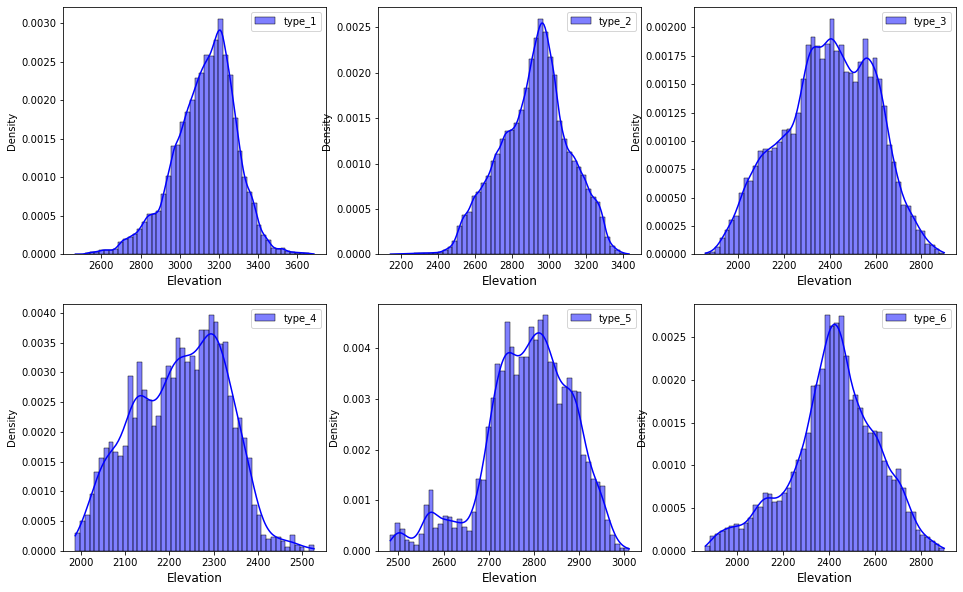

In [8]:
plot_numerical_original('Elevation')

<Figure size 432x288 with 0 Axes>

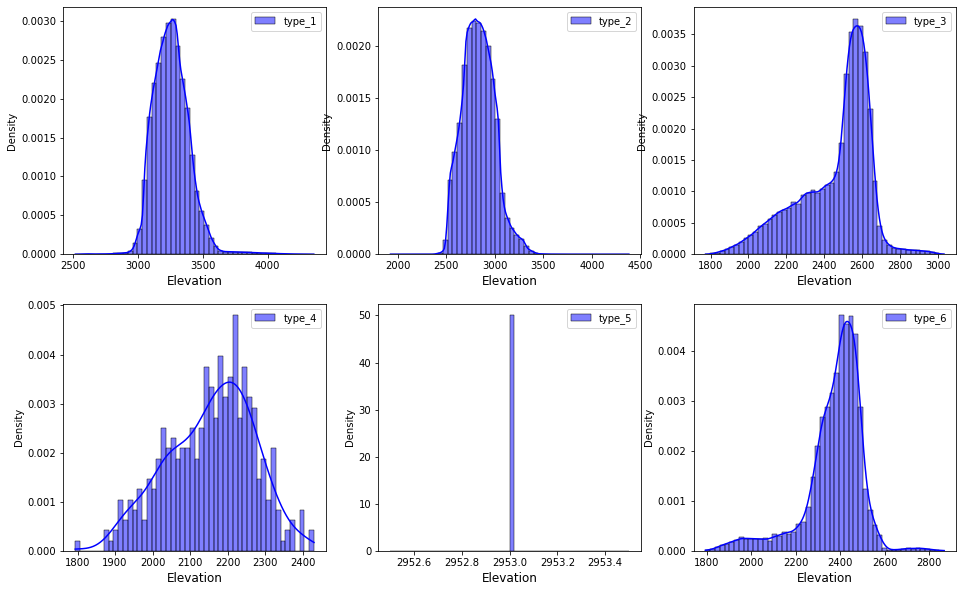

In [9]:
plot_numerical_synthetic('Elevation')

# Aspect

<Figure size 432x288 with 0 Axes>

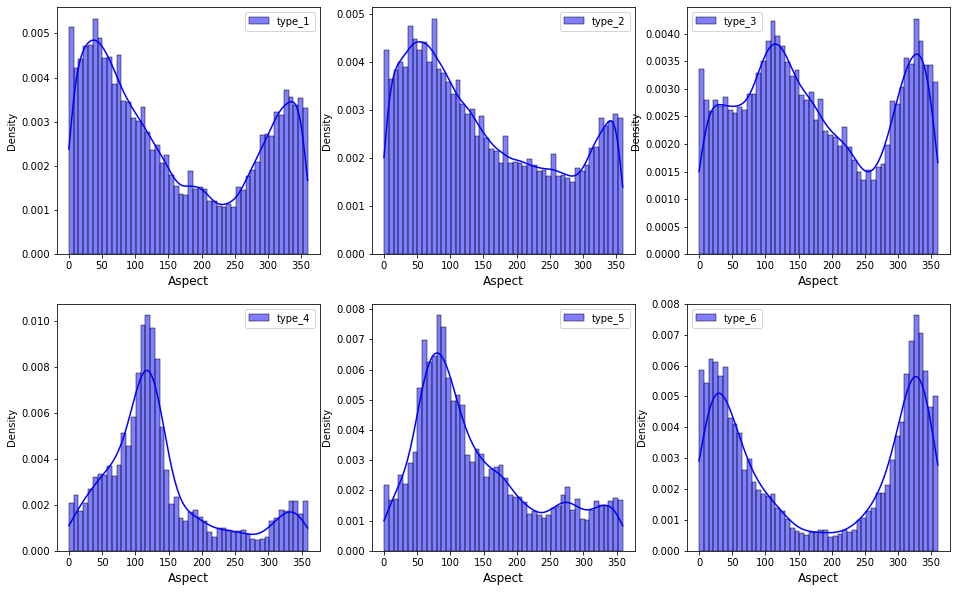

In [10]:
plot_numerical_original('Aspect')

<Figure size 432x288 with 0 Axes>

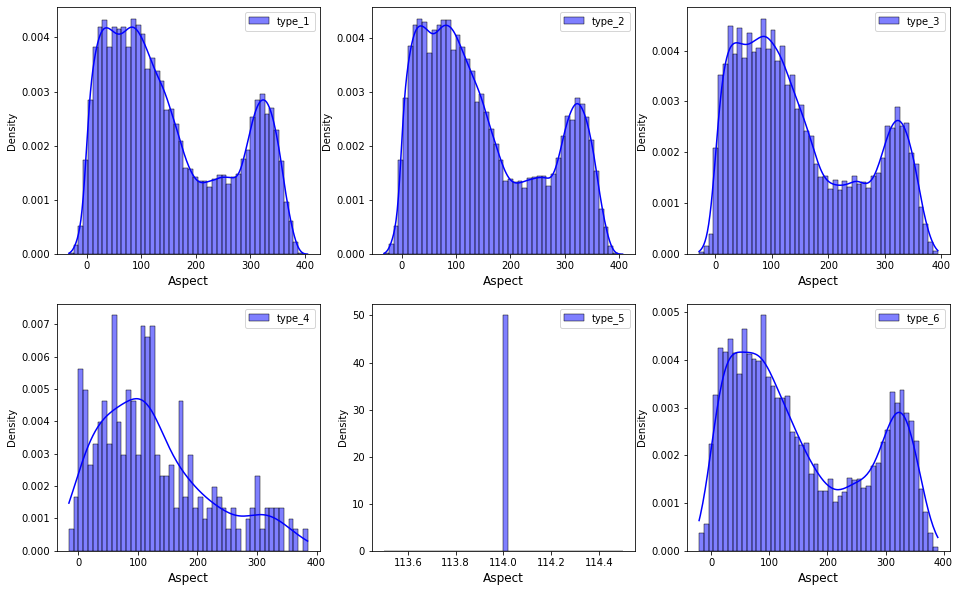

In [11]:
plot_numerical_synthetic('Aspect')

# Slope

<Figure size 432x288 with 0 Axes>

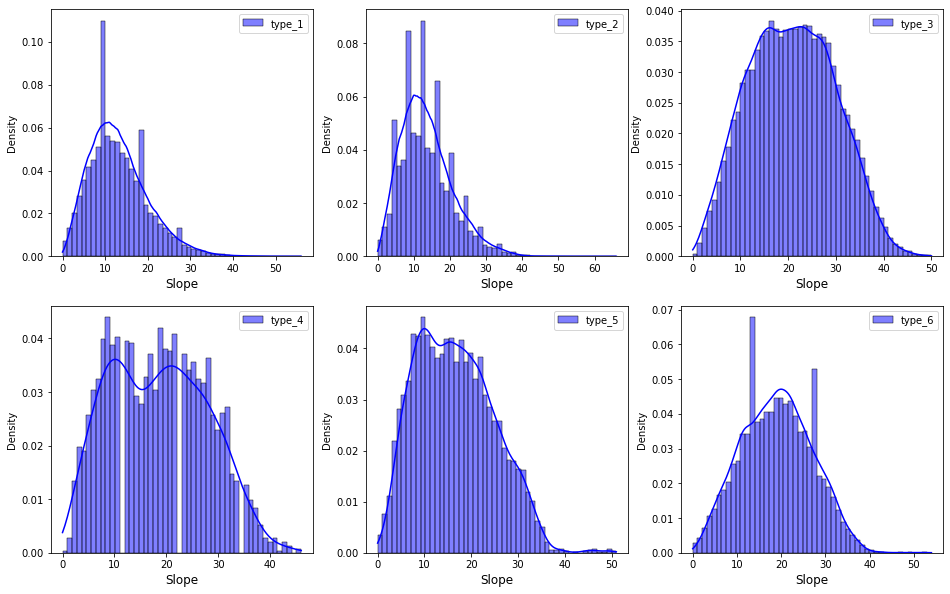

In [12]:
plot_numerical_original('Slope')

<Figure size 432x288 with 0 Axes>

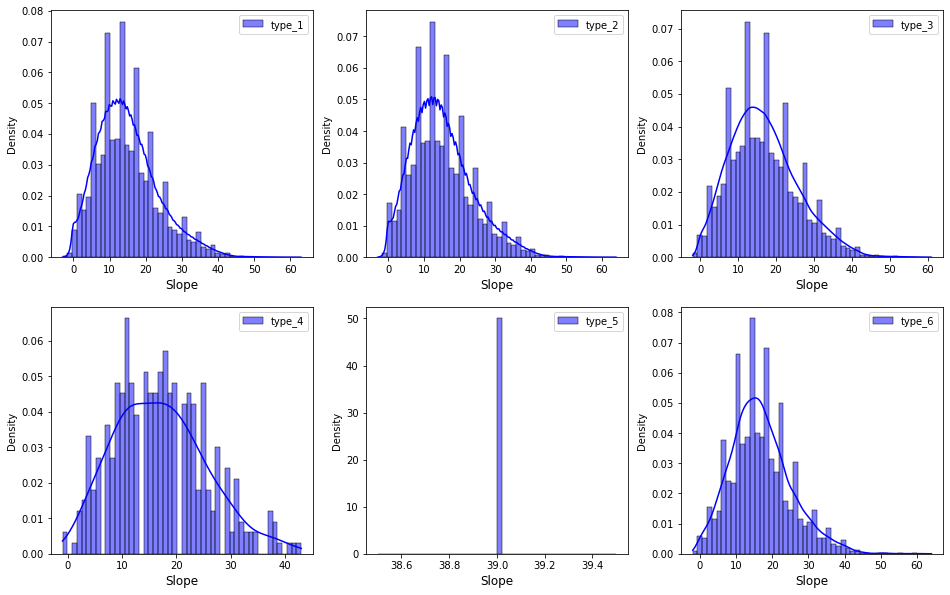

In [13]:
plot_numerical_synthetic('Slope')

# Hydrology

<Figure size 432x288 with 0 Axes>

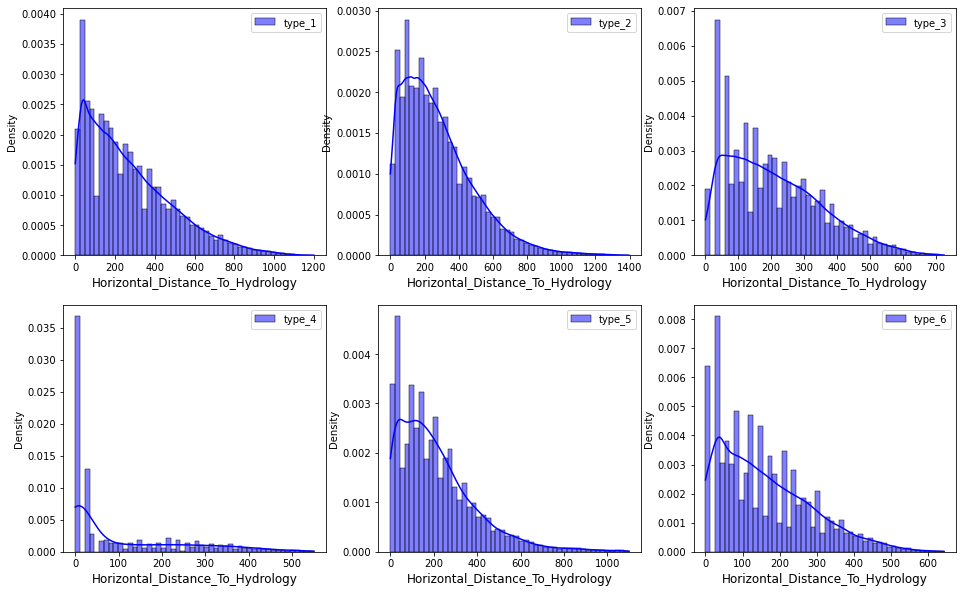

In [14]:
plot_numerical_original('Horizontal_Distance_To_Hydrology')

<Figure size 432x288 with 0 Axes>

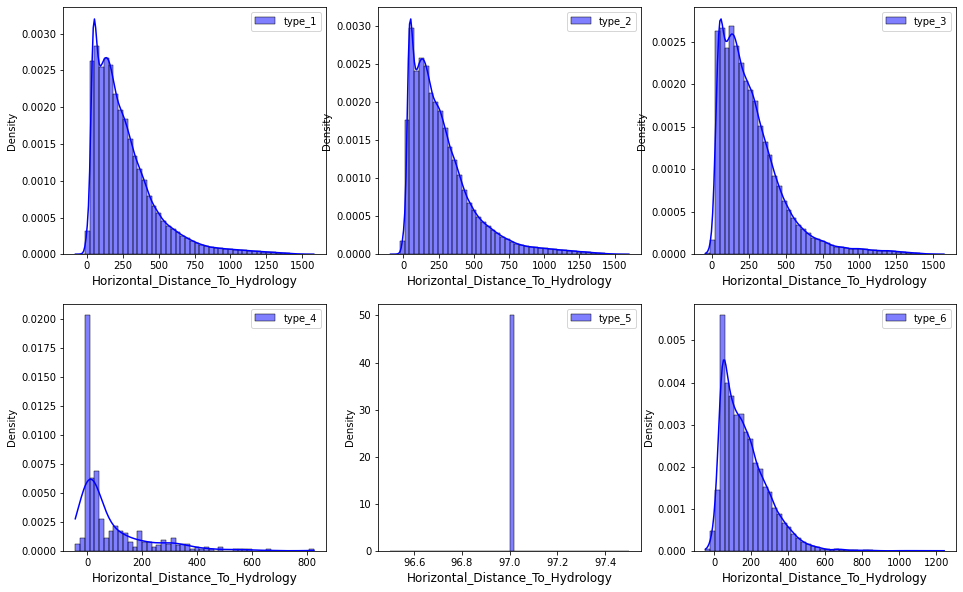

In [15]:
plot_numerical_synthetic('Horizontal_Distance_To_Hydrology')

<Figure size 432x288 with 0 Axes>

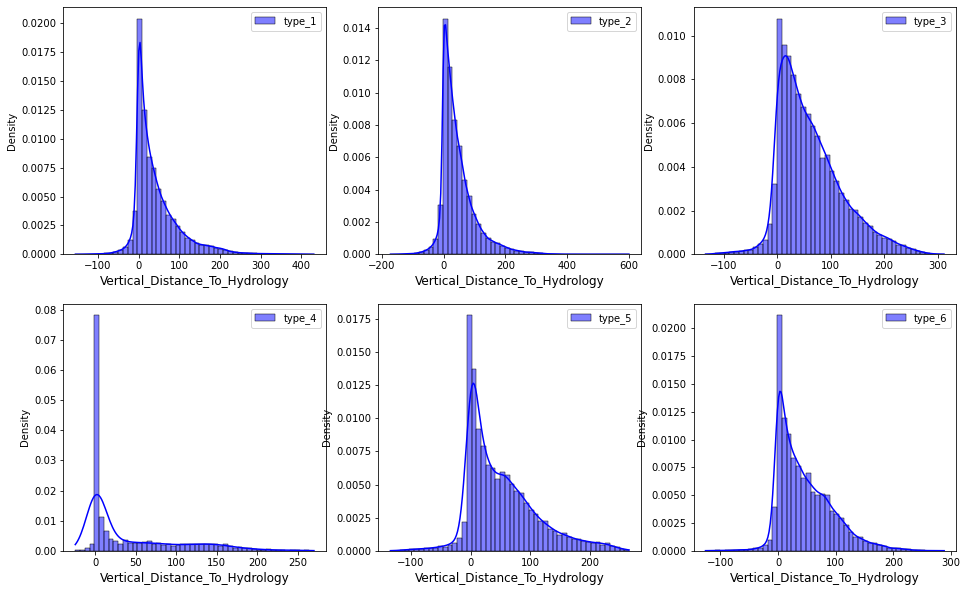

In [16]:
plot_numerical_original('Vertical_Distance_To_Hydrology')

<Figure size 432x288 with 0 Axes>

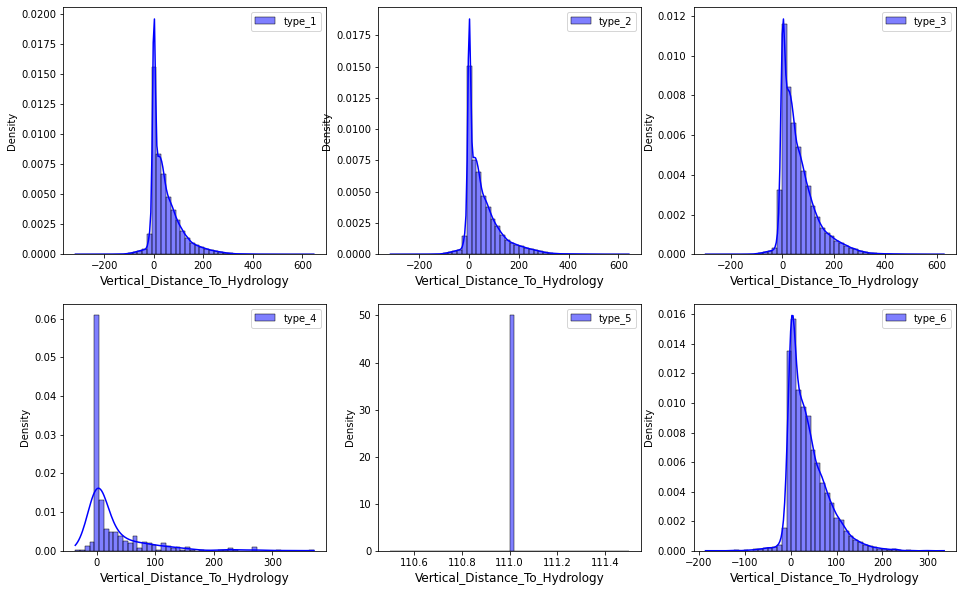

In [17]:
plot_numerical_synthetic('Vertical_Distance_To_Hydrology')

# Roadways

<Figure size 432x288 with 0 Axes>

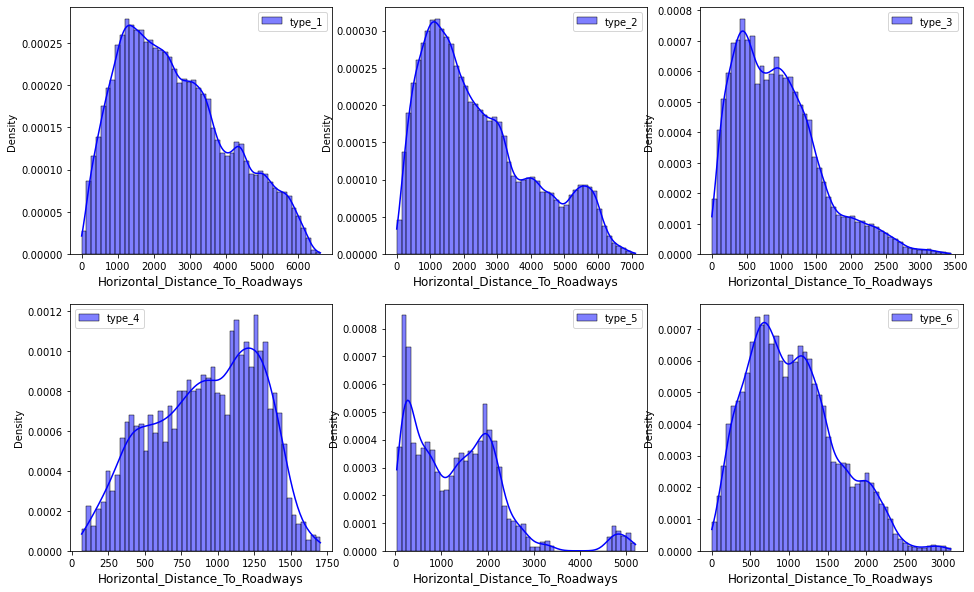

In [18]:
plot_numerical_original('Horizontal_Distance_To_Roadways')

<Figure size 432x288 with 0 Axes>

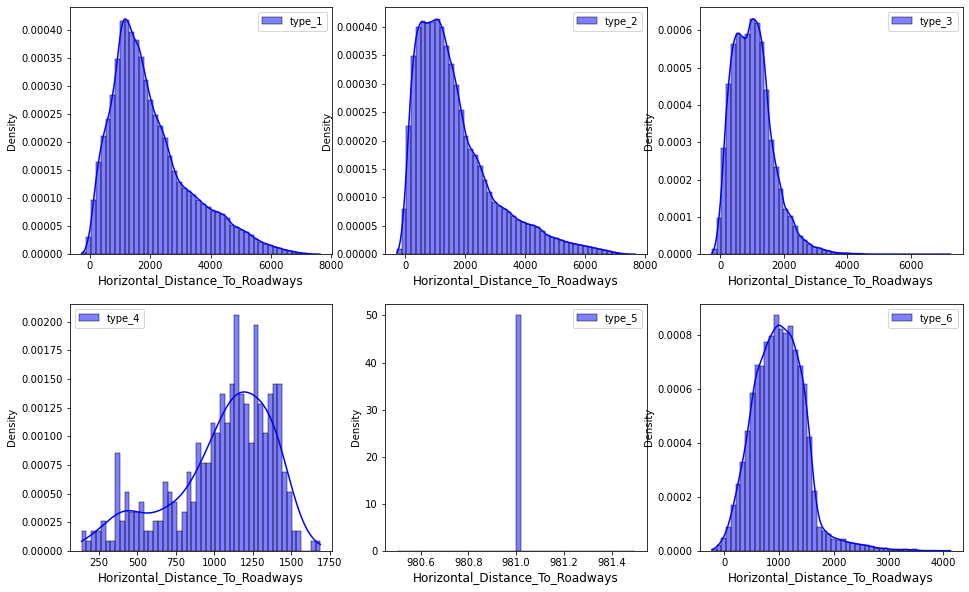

In [19]:
plot_numerical_synthetic('Horizontal_Distance_To_Roadways')

# Hillshade

<Figure size 432x288 with 0 Axes>

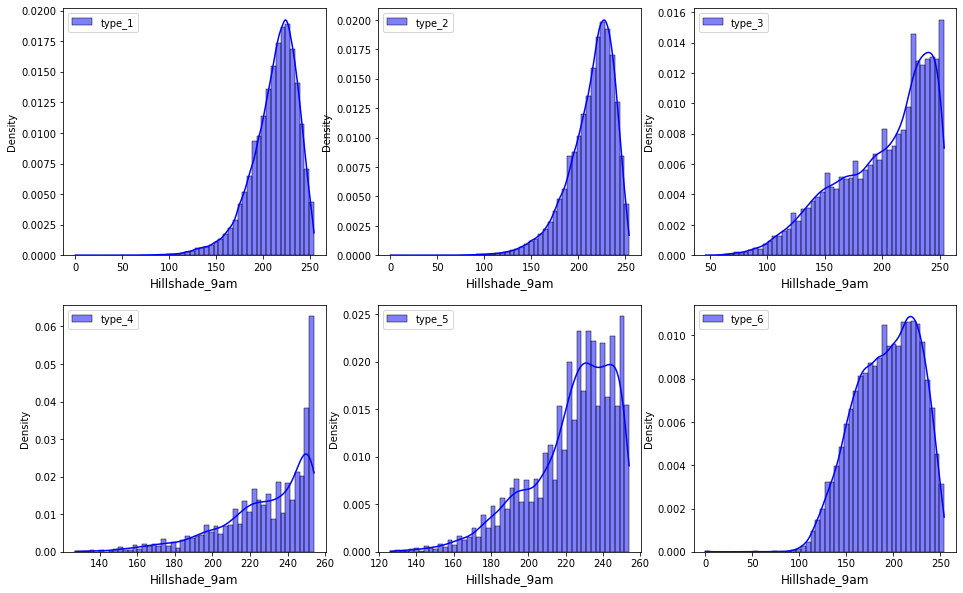

In [20]:
plot_numerical_original('Hillshade_9am')

<Figure size 432x288 with 0 Axes>

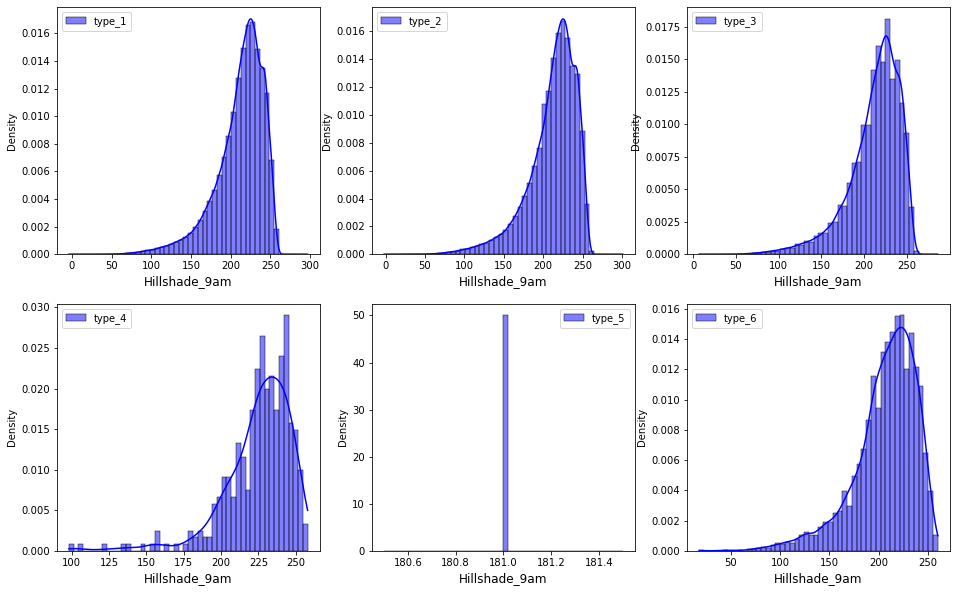

In [21]:
plot_numerical_synthetic('Hillshade_9am')

# Fire Points

<Figure size 432x288 with 0 Axes>

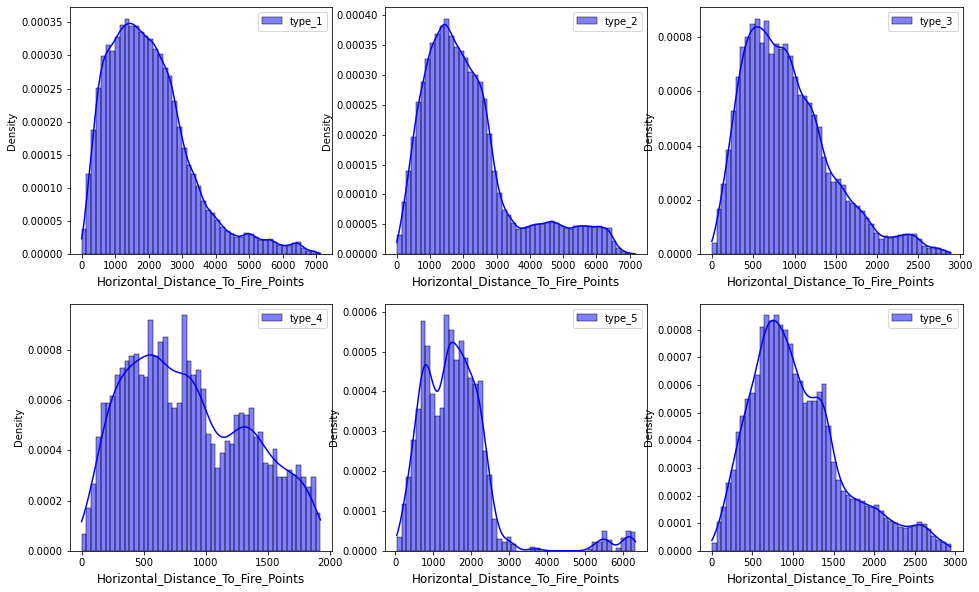

In [22]:
plot_numerical_original('Horizontal_Distance_To_Fire_Points')

<Figure size 432x288 with 0 Axes>

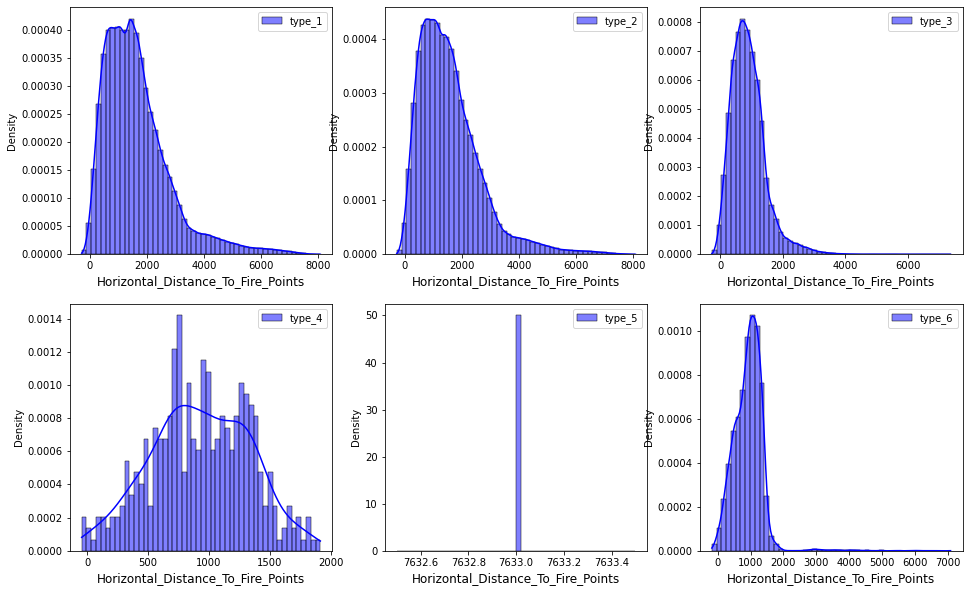

In [23]:
plot_numerical_synthetic('Horizontal_Distance_To_Fire_Points')

# Categorical Data

The original data consists of two one-hot encoded categorical variables:

* Wilderness Area (4 columns)
* Soil Type (40 columns)

In the original data, we could recombine these binary columns into a pair of columns with 4 and 40 levels respectively. However in the synthetic data which the CTGAN generated this is not possible since there are observations which do not have a soil type or have multiple soil types.

# Wilderness Areas

In [24]:
def counts_per_column(data, columns):
    temp = data[columns].sum(axis = 0)
    temp = pd.DataFrame(data = temp.round(2))
    temp.columns = ['Total']
    for i in sorted(set(data['Cover_Type'])):
        temp[f'Cover_{i}'] = data[columns][data.Cover_Type == i].sum(axis = 0)
    return temp

In [25]:
counts_per_column(original, wilderness_cols)

,Total,Cover_1,Cover_2,Cover_3,Cover_4,Cover_5,Cover_6,Cover_7
Wilderness_Area1,260796,105717,146197,0,0,3781,0,5101
Wilderness_Area2,29884,18595,8985,0,0,0,0,2304
Wilderness_Area3,253364,87528,125093,14300,0,5712,7626,13105
Wilderness_Area4,36968,0,3026,21454,2747,0,9741,0


In [26]:
counts_per_column(train, wilderness_cols)

,Total,Cover_1,Cover_2,Cover_3,Cover_4,Cover_5,Cover_6,Cover_7
Wilderness_Area1,1044772,438363,603399,31,0,0,1,2978
Wilderness_Area2,166644,86903,74686,2048,1,0,125,2881
Wilderness_Area3,2614293,860131,1573172,120129,0,1,2778,58082
Wilderness_Area4,87276,0,2661,75583,377,0,8655,0


# Soil Types

In [27]:
counts_per_column(original, soil_cols)

,Total,Cover_1,Cover_2,Cover_3,Cover_4,Cover_5,Cover_6,Cover_7
Soil_Type1,3031,0,0,2101,178,0,752,0
Soil_Type2,7525,0,852,4991,115,264,1303,0
Soil_Type3,4823,0,1191,2411,1018,0,203,0
Soil_Type4,12396,182,3251,7501,168,585,631,78
Soil_Type5,1597,0,0,967,48,0,582,0
Soil_Type6,6575,0,912,3993,320,0,1350,0
Soil_Type7,105,0,105,0,0,0,0,0
Soil_Type8,179,43,136,0,0,0,0,0
Soil_Type9,1147,161,986,0,0,0,0,0
Soil_Type10,32634,956,10803,11532,224,260,8859,0


In [28]:
counts_per_column(train, soil_cols)

,Total,Cover_1,Cover_2,Cover_3,Cover_4,Cover_5,Cover_6,Cover_7
Soil_Type1,67366,22355,37682,6084,39,0,413,793
Soil_Type2,123584,37647,64188,18983,30,0,848,1888
Soil_Type3,17102,1151,8571,6913,142,0,261,64
Soil_Type4,151651,48314,85916,14172,20,1,419,2809
Soil_Type5,62861,21941,35818,3703,8,0,227,1164
Soil_Type6,31891,8030,12100,10357,68,0,1008,328
Soil_Type7,0,0,0,0,0,0,0,0
Soil_Type8,11599,4219,6805,291,3,0,55,226
Soil_Type9,43572,15925,25866,839,4,0,161,777
Soil_Type10,218163,48667,144135,15347,22,0,6917,3075
